In [1]:
# STEP 1: Install required libraries
!pip install facenet-pytorch mtcnn opencv-python matplotlib scikit-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.

In [2]:
!pip uninstall -y numpy
!pip install numpy==1.23.5


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 60.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires numpy<2.0.0,>=1.24.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.38.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
jax 0.4.33 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.


In [1]:
# STEP 2: Import dependencies
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import DBSCAN
from facenet_pytorch import MTCNN, InceptionResnetV1
from tqdm import tqdm
import cv2
from google.colab import files

In [2]:
# STEP 3: Upload multiple face images
print("Please upload face images (can be multiple photos of same people)...")
uploaded = files.upload()

Please upload face images (can be multiple photos of same people)...


Saving download001.jpg to download001.jpg
Saving download002.jpg to download002.jpg
Saving download003.jpg to download003.jpg
Saving download004.jpg to download004.jpg
Saving download005.jpg to download005.jpg
Saving download006.jpg to download006.jpg
Saving download007.jpg to download007.jpg
Saving download008.jpg to download008.jpg
Saving download009.jpg to download009.jpg
Saving download010.jpg to download010.jpg
Saving download011.jpg to download011.jpg
Saving download012.jpg to download012.jpg
Saving download013.jpg to download013.jpg
Saving download014.jpg to download014.jpg
Saving download016.jpg to download016.jpg
Saving download017.jpg to download017.jpg
Saving download018.jpg to download018.jpg
Saving download019.jpg to download019.jpg
Saving download020.jpg to download020.jpg
Saving download021.jpg to download021.jpg
Saving download028.jpg to download028.jpg
Saving download029.jpg to download029.jpg
Saving download030.jpg to download030.jpg
Saving download031.jpg to download

In [3]:
# Save to a directory
os.makedirs("faces", exist_ok=True)
for filename in uploaded.keys():
    shutil.move(filename, f"faces/{filename}")

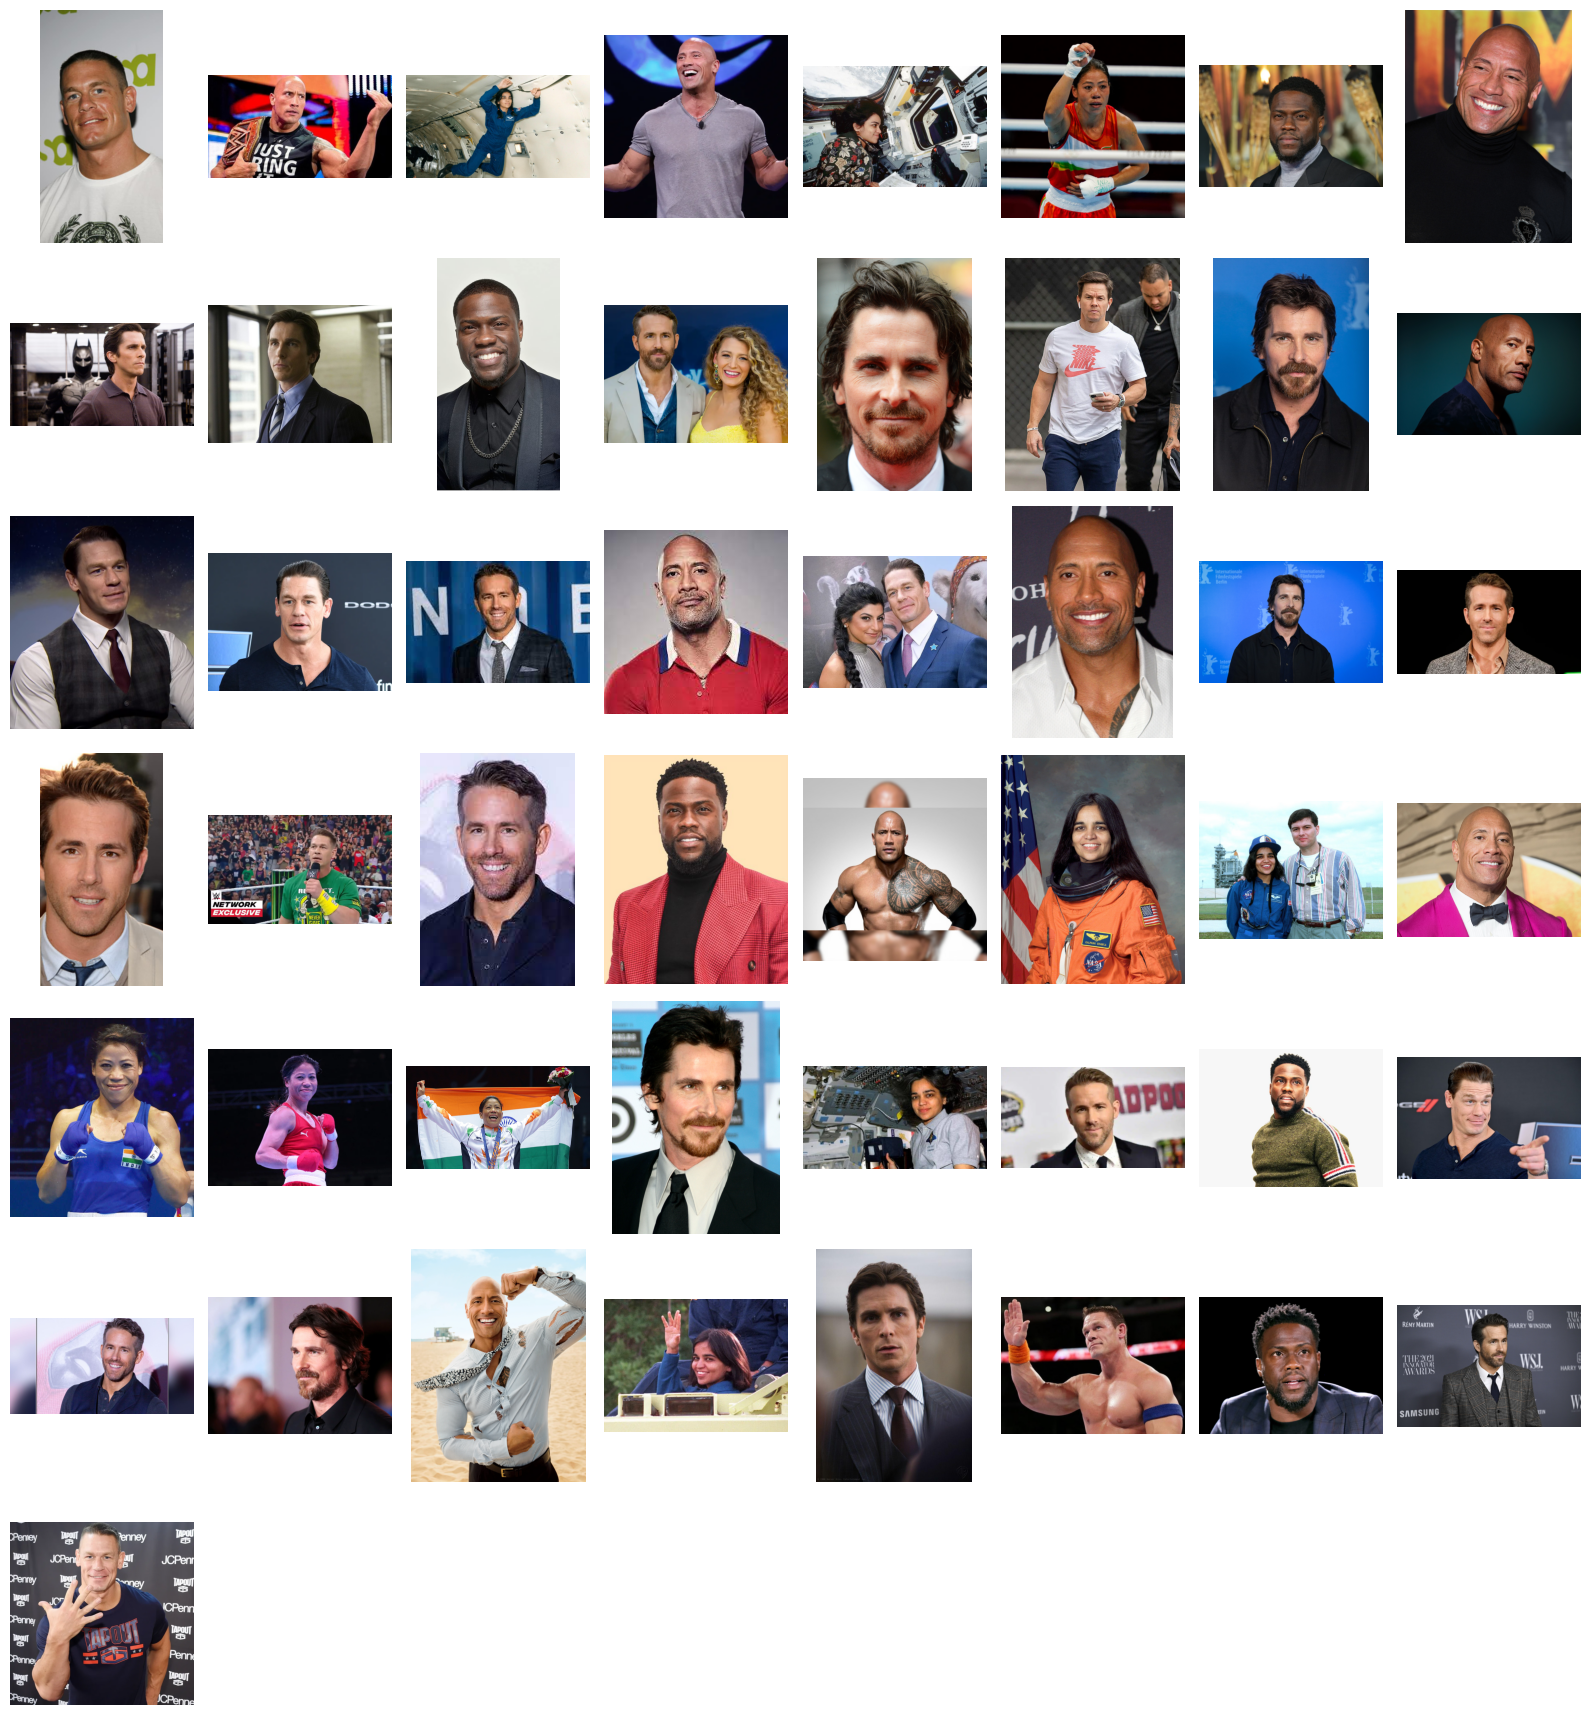

In [13]:
def show_all_faces_multirow(directory="faces", images_per_row=8):
    image_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    total_images = len(image_files)
    rows = (total_images + images_per_row - 1) // images_per_row

    plt.figure(figsize=(images_per_row * 2, rows * 2.5))

    for i, img_path in enumerate(image_files):
        img = Image.open(img_path)
        plt.subplot(rows, images_per_row, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

show_all_faces_multirow()


In [4]:
# STEP 4: Load Face Detector and Embedding Model
mtcnn = MTCNN(image_size=160, margin=20, keep_all=False, post_process=True)
resnet = InceptionResnetV1(pretrained='vggface2').eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [5]:
# STEP 5: Extract Face Embeddings
face_embeddings = []
file_paths = []

for filename in tqdm(os.listdir("faces")):
    path = os.path.join("faces", filename)
    try:
        img = Image.open(path).convert('RGB')
        face = mtcnn(img)
        if face is not None:
            embedding = resnet(face.unsqueeze(0))
            face_embeddings.append(embedding.detach().numpy()[0])
            file_paths.append(path)
    except Exception as e:
        print(f"Error processing {filename}: {e}")

face_embeddings = np.array(face_embeddings)

100%|██████████| 49/49 [00:47<00:00,  1.04it/s]


In [6]:
# STEP 6: Cluster using DBSCAN
clustering = DBSCAN(eps=0.9, min_samples=1, metric='euclidean')
labels = clustering.fit_predict(face_embeddings)

In [7]:
# STEP 7: Group and visualize
grouped_faces = {}
for label, path in zip(labels, file_paths):
    grouped_faces.setdefault(label, []).append(path)


--- Group 1 (8 images) ---


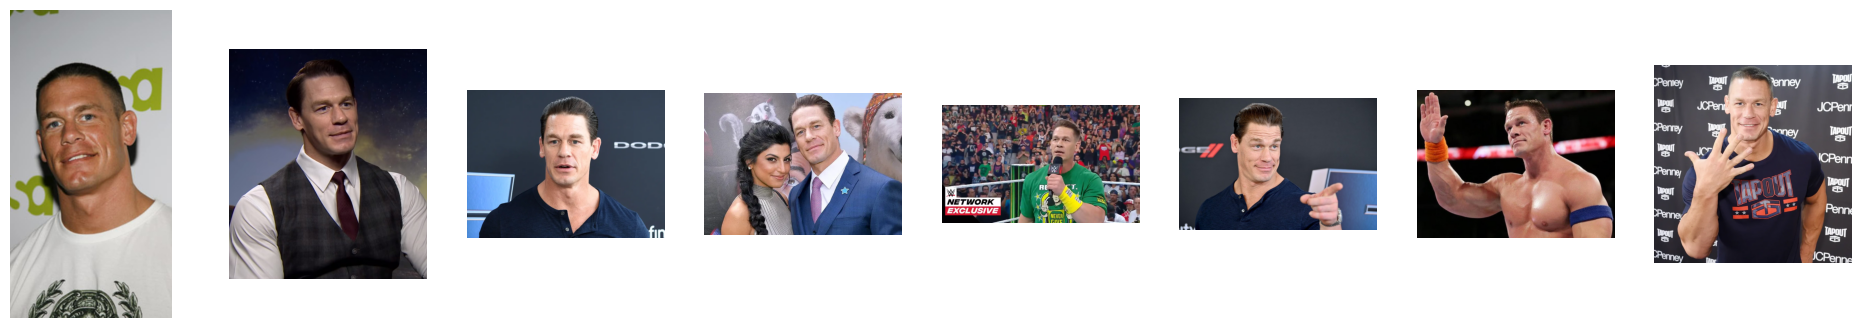


--- Group 2 (9 images) ---


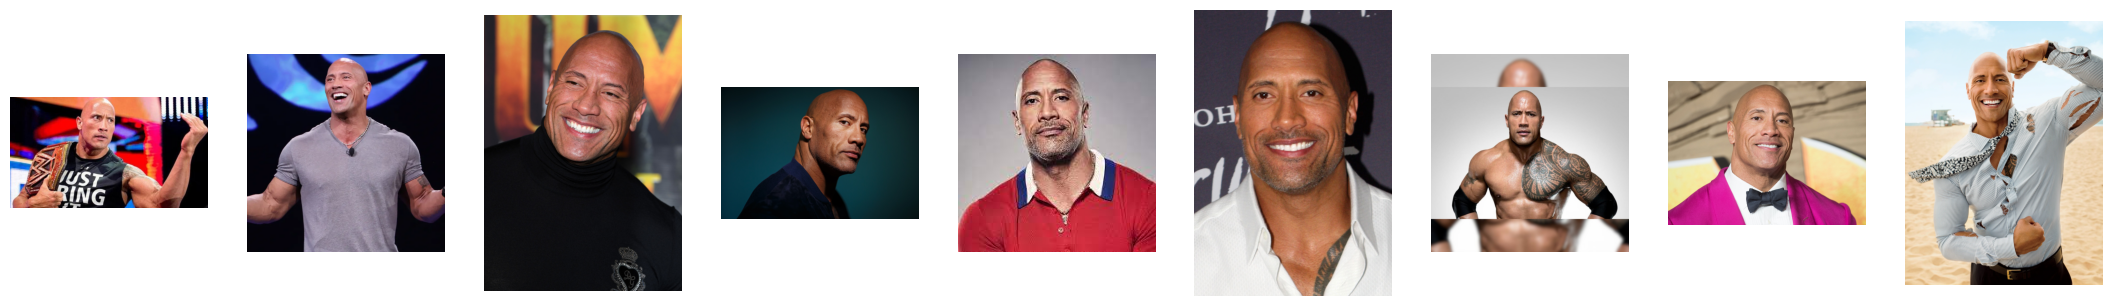


--- Group 3 (5 images) ---


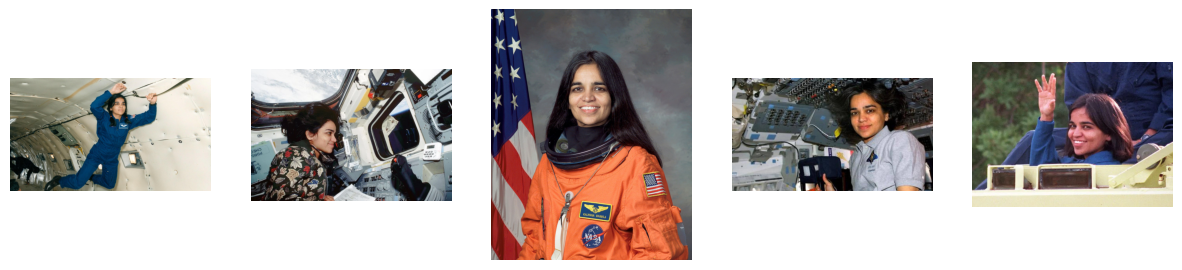


--- Group 4 (4 images) ---


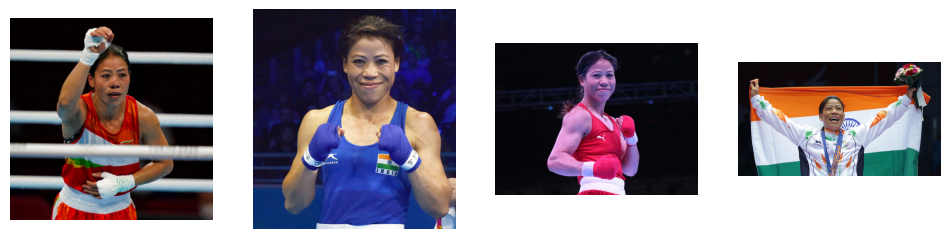


--- Group 5 (5 images) ---


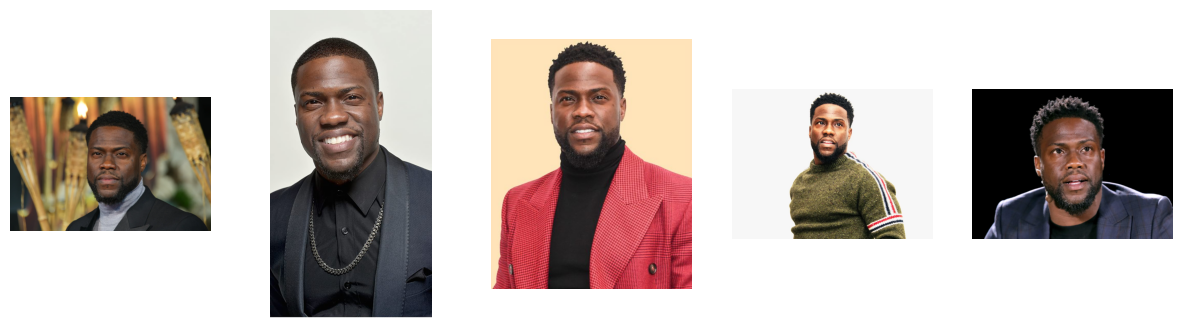


--- Group 6 (8 images) ---


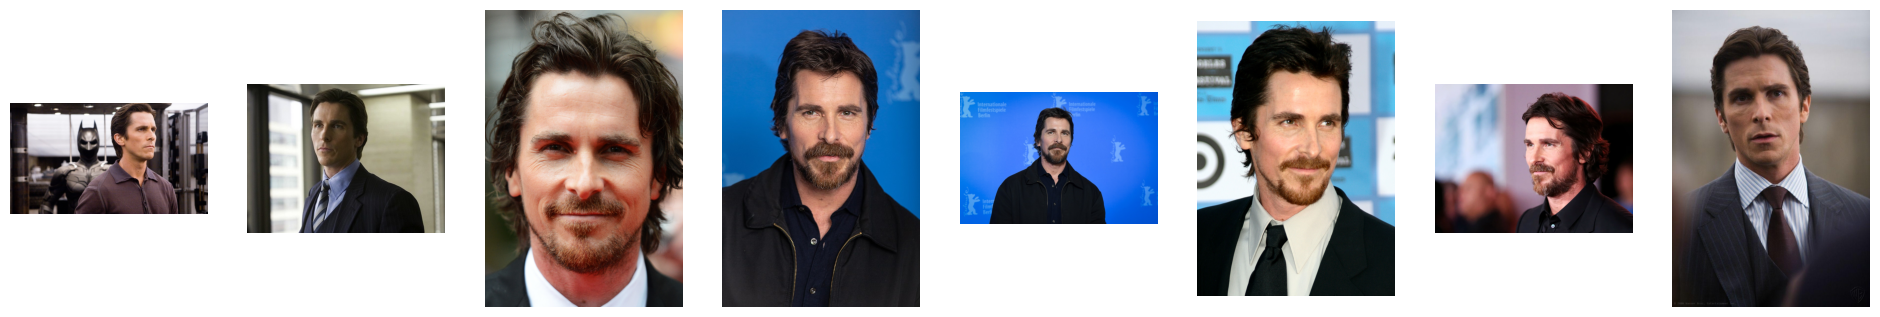


--- Group 7 (1 images) ---


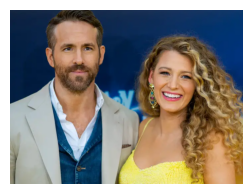


--- Group 8 (1 images) ---


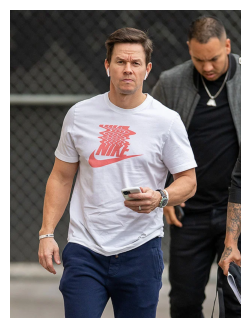


--- Group 9 (7 images) ---


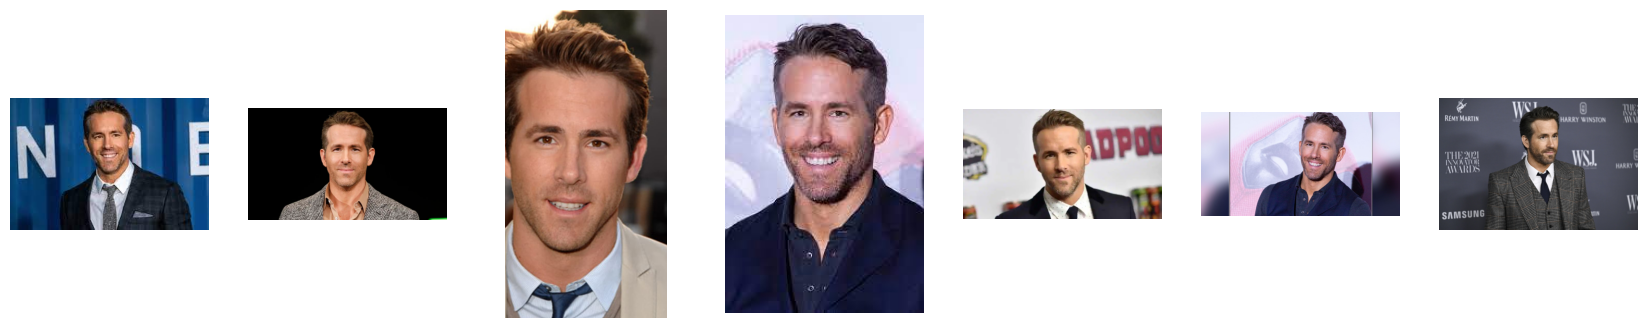


--- Group 10 (1 images) ---


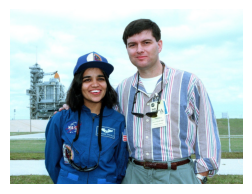

In [11]:
def show_images_grouped(grouped_faces):
    for label, img_paths in grouped_faces.items():
        print(f"\n--- Group {label + 1} ({len(img_paths)} images) ---")

        plt.figure(figsize=(3 * len(img_paths), 4))
        for i, img_path in enumerate(img_paths):
            img = Image.open(img_path)
            plt.subplot(1, len(img_paths), i + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

# Use this after you have the grouped_faces dict ready
show_images_grouped(grouped_faces)